In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset with explicit separator and handling of potential issues
file_path = "protein_links.txt"
df = pd.read_csv(file_path, sep=" ", engine="python")  # Changed separator to space

In [3]:
# Check if the dataset was read correctly
print(df.head())
print(df.columns)  # Verify if columns are properly parsed

               protein1              protein2  neighborhood  \
0  9606.ENSP00000000233  9606.ENSP00000356607             0   
1  9606.ENSP00000000233  9606.ENSP00000427567             0   
2  9606.ENSP00000000233  9606.ENSP00000253413             0   
3  9606.ENSP00000000233  9606.ENSP00000493357             0   
4  9606.ENSP00000000233  9606.ENSP00000324127             0   

   neighborhood_transferred  fusion  cooccurence  homology  coexpression  \
0                         0       0            0         0             0   
1                         0       0            0         0             0   
2                         0       0            0         0            49   
3                         0       0            0         0            56   
4                         0       0            0         0             0   

   coexpression_transferred  experiments  experiments_transferred  database  \
0                        45            0                      134         0   
1     

In [4]:
# # Save the correctly formatted data
df.to_csv("protein_links_cleaned.csv", index=False)

In [5]:
# Reduce data size if needed before saving as Excel
if df.shape[0] > 1_048_576:  # Excel row limit
    df_sampled = df.sample(n=1_000_000, random_state=42)  # Reduce size
else:
    df_sampled = df

In [6]:
# df_sampled.to_excel("protein_links.xlsx", index=False)

In [7]:
# Display the first few rows as a table
display(df.head())

,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,0,0,0,45,0,134,0,0,0,81,173
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,0,0,0,0,128,0,0,0,70,154
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,0,0,49,111,0,49,0,0,0,69,151
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,0,0,56,0,0,53,0,0,433,81,471
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,0,0,0,0,46,0,0,153,91,201


In [8]:
# Count the number of rows where 'fusion' > 0
num_fusion_gt_zero = (df['fusion'] > 0).sum()
print(f"Number of rows where fusion > 0: {num_fusion_gt_zero}")

Number of rows where fusion > 0: 60746


In [9]:
# Count the number of rows where 'fusion' > 0
num_fusion_gt_zero = (df['neighborhood'] > 0).sum()
print(f"Number of rows where neighborhood > 0: {num_fusion_gt_zero}")

Number of rows where neighborhood > 0: 0


In [10]:
# Count the number of rows where 'fusion' > 0
num_fusion_gt_zero = (df['neighborhood_transferred'] > 0).sum()
print(f"Number of rows where neighborhood_transferred > 0: {num_fusion_gt_zero}")

Number of rows where neighborhood_transferred > 0: 571332


In [11]:
# Create a separate dataframe with relevant columns for PPI
relevant_columns = [
    "protein1", "protein2", "experiments", "database", "homology", "fusion", 
    "coexpression", "textmining", "combined_score"
]
df_ppi = df[relevant_columns]

In [13]:
# # Save the relevant PPI data
# df_ppi.to_csv("protein_links_ppi.csv", index=False)
# print("Relevant PPI dataframe created and saved as protein_links_ppi.csv")

In [14]:
# Display the new dataframe
display(df_ppi.head())

,protein1,protein2,experiments,database,homology,fusion,coexpression,textmining,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,0,0,0,173
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,0,0,154
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,0,49,0,151
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,0,56,433,471
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,0,153,201


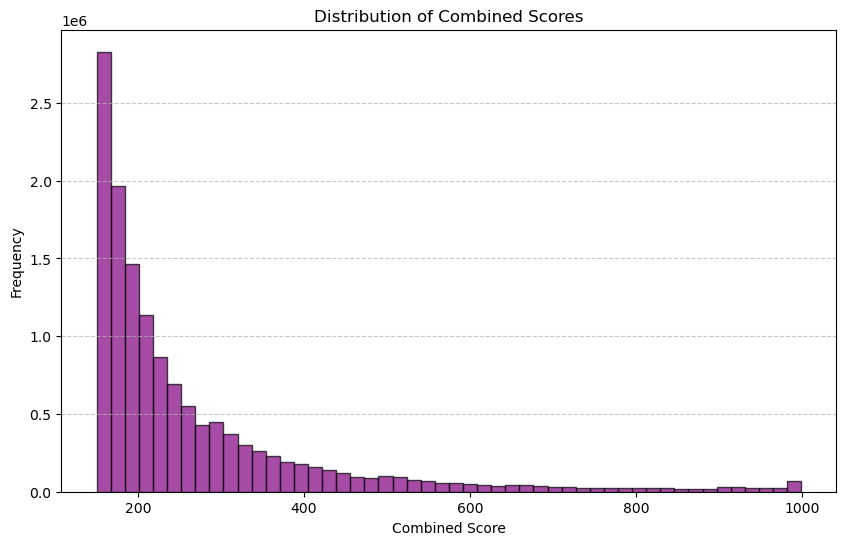

In [15]:
# Plot the distribution of the 'combined_score' column
plt.figure(figsize=(10, 6))
plt.hist(df['combined_score'], bins=50, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Combined Score")
plt.ylabel("Frequency")
plt.title("Distribution of Combined Scores")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [16]:
# Filter rows where protein1 is '9606.ENSP00000000233' and protein2 is 'ENSP00000440005'
df_filtered = df[(df['protein1'] == "9606.ENSP00000000233") & (df['protein2'] == "9606.ENSP00000440005")]
print(f"Number of rows with protein1 as '9606.ENSP00000000233' and protein2 as 'ENSP00000440005': {len(df_filtered)}")
display(df_filtered.head())

Number of rows with protein1 as '9606.ENSP00000000233' and protein2 as 'ENSP00000440005': 1


,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
945,9606.ENSP00000000233,9606.ENSP00000440005,0,0,0,0,978,75,74,711,0,500,0,61,0,862


In [17]:
# Filter rows where protein1 is '9606.ENSP00000000233' and protein2 is 'ENSP00000440005'
df_filtered = df[(df['protein1'] == "9606.ENSP00000000233") & (df['protein2'] == "9606.ENSP00000262305")]
print(f"Number of rows with protein1 as '9606.ENSP00000000233' and protein2 as '9606.ENSP00000262305': {len(df_filtered)}")
display(df_filtered.head())

Number of rows with protein1 as '9606.ENSP00000000233' and protein2 as '9606.ENSP00000262305': 1


,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
160,9606.ENSP00000000233,9606.ENSP00000262305,0,0,0,0,0,0,0,625,139,0,0,865,46,952


In [18]:
# Filter rows where protein1 is '9606.ENSP00000000233' and protein2 is 'ENSP00000440005'
df_filtered = df[(df['protein1'] == "9606.ENSP00000000233") & (df['database'] > 0)]
print(f"Number of rows with protein1 as '9606.ENSP00000000233' and protein2 as '9606.ENSP00000480301': {len(df_filtered)}")
display(df_filtered.head(20))

Number of rows with protein1 as '9606.ENSP00000000233' and protein2 as '9606.ENSP00000480301': 90


,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
16,9606.ENSP00000000233,9606.ENSP00000354878,0,0,0,0,0,42,0,0,0,500,0,0,66,513
26,9606.ENSP00000000233,9606.ENSP00000310226,0,0,0,0,655,84,67,0,110,500,0,154,114,648
34,9606.ENSP00000000233,9606.ENSP00000363232,0,0,0,0,0,0,0,0,105,500,0,0,0,533
80,9606.ENSP00000000233,9606.ENSP00000405926,0,0,0,0,0,49,90,0,114,500,0,0,0,565
100,9606.ENSP00000000233,9606.ENSP00000363524,0,0,0,0,0,42,0,0,0,500,0,0,63,511
105,9606.ENSP00000000233,9606.ENSP00000300087,0,0,0,0,0,55,83,0,0,500,0,0,44,530
130,9606.ENSP00000000233,9606.ENSP00000357048,0,0,0,0,0,60,60,196,131,500,0,159,156,718
146,9606.ENSP00000000233,9606.ENSP00000354947,0,0,0,0,0,86,51,0,88,500,0,0,68,564
154,9606.ENSP00000000233,9606.ENSP00000258739,0,0,0,0,0,72,59,0,68,500,0,101,71,581
182,9606.ENSP00000000233,9606.ENSP00000273130,0,0,0,0,0,47,49,0,0,500,0,0,62,518


In [19]:
# Filter rows where protein1 is '9606.ENSP00000000233' and protein2 is 'ENSP00000440005'
df_filtered = df[(df['protein1'] == "9606.ENSP00000000233") & (df['combined_score'] > 0) & (df['combined_score'] < 400)]
display(df_filtered.head(20))

,protein1,protein2,neighborhood,neighborhood_transferred,fusion,cooccurence,homology,coexpression,coexpression_transferred,experiments,experiments_transferred,database,database_transferred,textmining,textmining_transferred,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,0,0,0,45,0,134,0,0,0,81,173
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,0,0,0,0,128,0,0,0,70,154
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,0,0,49,111,0,49,0,0,0,69,151
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,0,0,0,0,46,0,0,153,91,201
5,9606.ENSP00000000233,9606.ENSP00000325266,0,0,0,0,0,49,86,0,125,0,0,0,50,180
6,9606.ENSP00000000233,9606.ENSP00000320935,0,0,0,0,0,0,55,73,50,0,0,118,57,181
8,9606.ENSP00000000233,9606.ENSP00000480364,0,0,0,0,0,56,0,0,58,0,0,0,126,154
9,9606.ENSP00000000233,9606.ENSP00000388107,0,0,0,0,0,48,87,0,64,0,0,0,91,161
10,9606.ENSP00000000233,9606.ENSP00000461784,0,0,0,0,0,49,45,0,126,0,0,176,99,303
11,9606.ENSP00000000233,9606.ENSP00000381097,0,0,0,0,0,0,74,0,110,0,0,51,62,168


In [111]:
# Function to load TSV files with error handling
def load_tsv(file_path):
    try:
        df = pd.read_csv(file_path, sep="\t", header = None, on_bad_lines='skip')  # Skip problematic lines
        print(f"Successfully loaded {file_path} with {df.shape[0]} rows and {df.shape[1]} columns.")
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

In [52]:
# Load additional datasets
file_actions_27k = "protein.actions.SHS27k.tsv"
file_actions_148k = "protein.actions.SHS148k.tsv"
file_sequences = "protein.sequences.dictionary.both.tsv"

In [95]:
df_actions_27k = pd.read_csv("protein.actions.SHS27k.tsv", sep="\t")

In [97]:
df_actions_148k = pd.read_csv("protein.actions.SHS148k.tsv", sep="\t")

In [113]:
df_sequences = load_tsv("protein.sequences.dictionary.both.tsv")

Successfully loaded protein.sequences.dictionary.both.tsv with 20456 rows and 2 columns.


In [101]:
# Display the first few rows as a table
display(df_actions_27k.head())

item_id_a  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000000233   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000000233   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  9606.ENSP00000000233   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...  9606.ENSP00000000233   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...  9606.ENSP00000000233   

                                                                                                                  item_id_b  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000250971   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...  9606.ENSP00000250971   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  9606.ENSP00000019317   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...  9606.ENSP00000216373   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...  9606.ENSP00000012443   

                                                                                                             mode  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...    reaction   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...    reaction   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  activation   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...    reaction   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...   catalysis   

                                                                                                           action  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...         NaN   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...         NaN   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...  activation   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...         NaN   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...         NaN   

                                                                                                      is_directional  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...              t   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...              t   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...              f   
                                                   MQQAPQPYEFFSEENSPKWRGLLVSALRKVQEQVHPTLSANEESLYY...              f   
                                                   MAMAEGERTECAEPPRDEPPADGALKRAEELKTQANDYFKAKDYENA...              t   

                                                                                                      a_is_acting  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...           t   
                                                   MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG...           f   
                                                   MTECFLPPTSSPSEHRRVEHGSGLTRTPSSEEISPTKFPGLYRTGEP...         

In [67]:
# Display the first few rows as a table
display(df_actions_148k.head(10))

item_id_a  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000000233   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000000233   

                                                                                                                  item_id_b  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...  9606.ENSP00000265709   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  9606.ENSP00000263025   

                                                                                                             mode  \
MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTIP... MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...       ptmod   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...    reaction   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...   catalysis   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  inhibition   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...     binding   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...   catalysis   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  inhibition   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...  inhibition   
                                                   MAQAAKQLKKIKDIEAQALQEQKEKEESNRKRRNRSRDRKKKADAAT...     binding   
                                                   MAAAAAQGGGGGEPRRTEGVGPGVPGEVEMVKGQPFDVGPRYTQLQY...   catalysis   

                              

In [119]:
# Display the first few rows as a table
display(df_sequences.head())

,Sequence,item_id
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...


In [117]:
# Rename the columns manually
df_sequences.rename(columns={df_sequences.columns[0]: "Sequence", df_sequences.columns[1]: "item_id"}, inplace=True)

# Display the updated dataframe
display(df_sequences.head())

,Sequence,item_id
0,9606.ENSP00000000233,MGLTVSALFSRIFGKKQMRILMVGLDAAGKTTILYKLKLGEIVTTI...
1,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...
2,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...
3,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...
4,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...


In [105]:
# Rename columns while keeping all rows
df_sequences.columns = ["item_id", "Sequence"]

# Display the dataframe to check if the first row is preserved
display(df_sequences.head())

,item_id,Sequence
0,9606.ENSP00000000412,MFPFYSCWRTGLLLLLLAVAVRESWQTEEKTCDLVGEKGKESEKEL...
1,9606.ENSP00000000442,MSSQVVGIEPLYIKAEPASPDSPKGSSETETEPPVALAPGPAPTRC...
2,9606.ENSP00000001008,MTAEEMKATESGAQSAPLPMEGVDISPKQDEGVLKVIKREGTGTEM...
3,9606.ENSP00000001146,MLFEGLDLVSALATLAACLVSVTLLLAVSQQLWQLRWAATRDKSCK...
4,9606.ENSP00000002125,MSVLLRSGLGPLCAVARAAIPFIWRGKYFSSGNEPAENPVTPMLRH...
